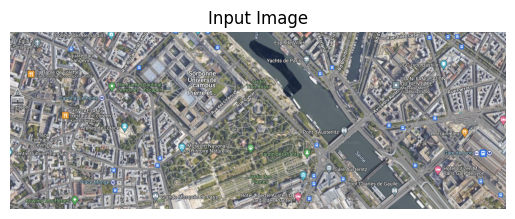

1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 4s 4s/step


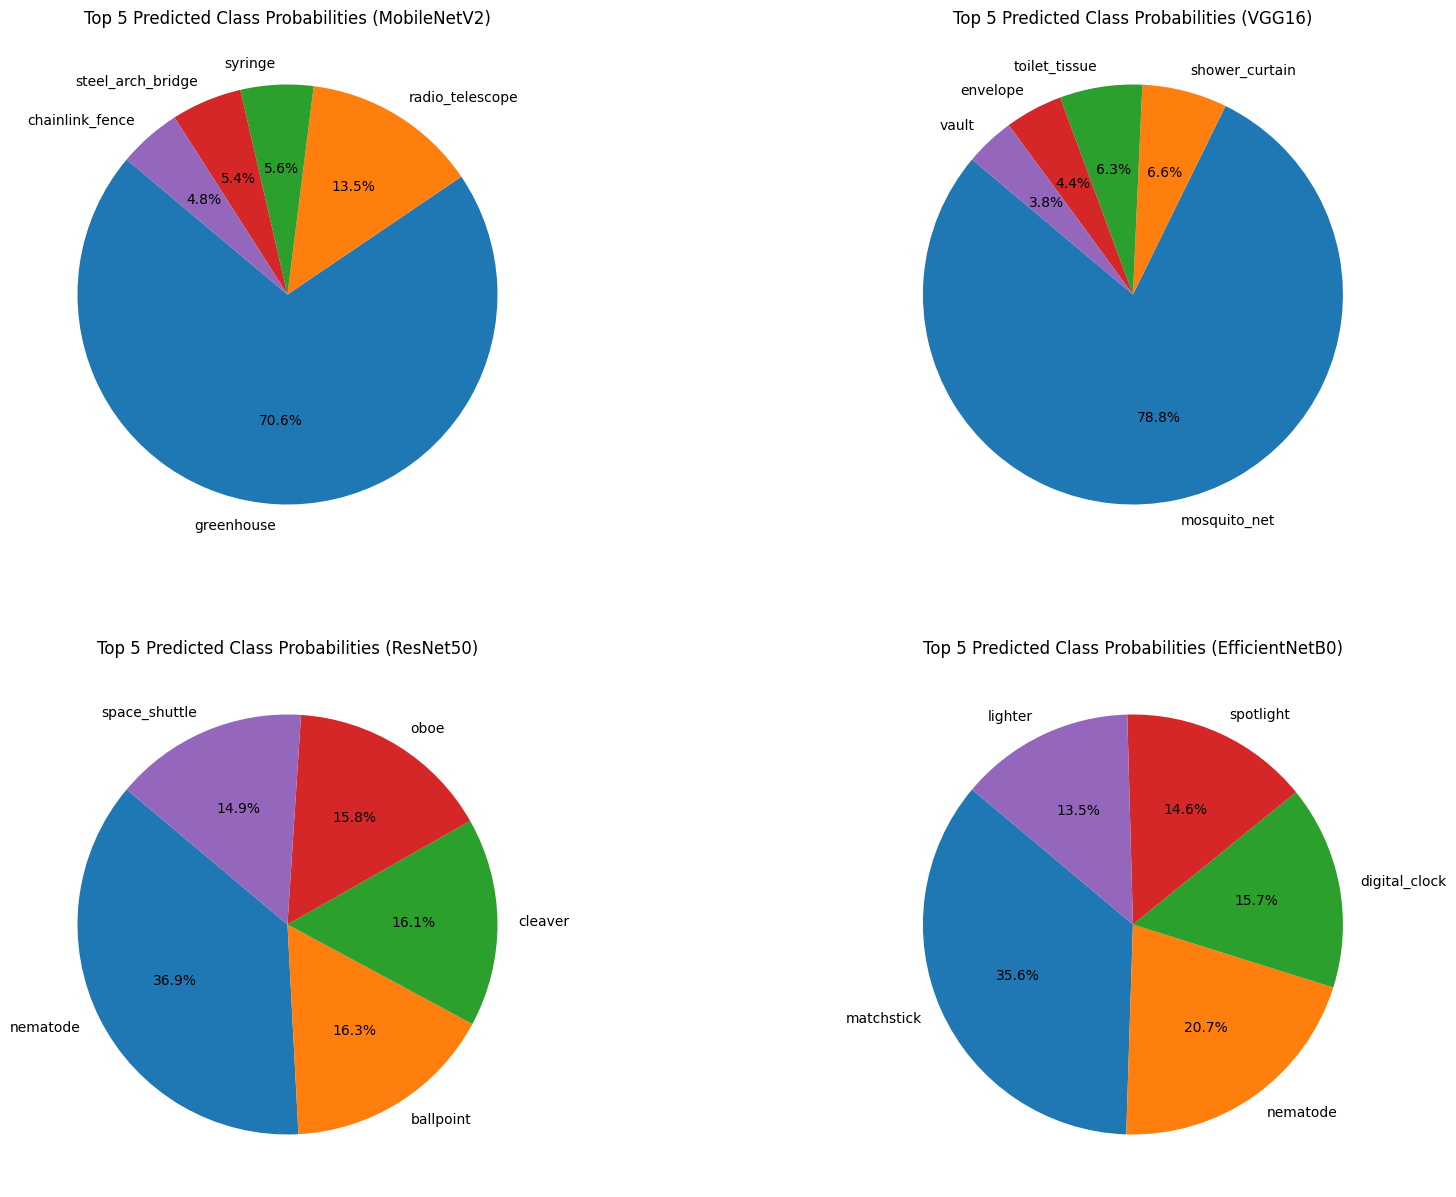

In [4]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.efficientnet import EfficientNetB0

# Function to load and preprocess the image
def load_and_preprocess_image(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content)).convert("RGB")  # Convert to RGB to remove alpha channel
    image = image.resize((224, 224))  # Resize to match the input shape expected by the models
    image_array = np.array(image)
    image_array = preprocess_input(image_array)  # Preprocess the input according to the model requirements
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

# Load the image from the provided URL
image_url = "https://drive.google.com/uc?id=1M9fCKB0hpmqZsuv9fVK02lZ3095UYYwf"
input_img = load_and_preprocess_image(image_url)

# Display the loaded image
plt.imshow(Image.open(BytesIO(requests.get(image_url).content)))
plt.title("Input Image")
plt.axis('off')
plt.show()

# Load the pre-trained models
model_mobilenet = MobileNetV2(weights='imagenet')
model_vgg16 = VGG16(weights='imagenet')
model_resnet50 = ResNet50(weights='imagenet')
model_efficientnetb0 = EfficientNetB0(weights='imagenet')

# Classify the image with MobileNetV2
preds_mobilenet = model_mobilenet.predict(input_img)
top_5_preds_mobilenet = decode_predictions(preds_mobilenet, top=5)[0]
class_names_mobilenet = [class_name for _, class_name, _ in top_5_preds_mobilenet]
class_probs_mobilenet = [class_prob for _, _, class_prob in top_5_preds_mobilenet]

# Classify the image with VGG16
preds_vgg16 = model_vgg16.predict(input_img)
top_5_preds_vgg16 = decode_predictions(preds_vgg16, top=5)[0]
class_names_vgg16 = [class_name for _, class_name, _ in top_5_preds_vgg16]
class_probs_vgg16 = [class_prob for _, _, class_prob in top_5_preds_vgg16]

# Classify the image with ResNet50
preds_resnet50 = model_resnet50.predict(input_img)
top_5_preds_resnet50 = decode_predictions(preds_resnet50, top=5)[0]
class_names_resnet50 = [class_name for _, class_name, _ in top_5_preds_resnet50]
class_probs_resnet50 = [class_prob for _, _, class_prob in top_5_preds_resnet50]

# Classify the image with EfficientNetB0
preds_efficientnetb0 = model_efficientnetb0.predict(input_img)
top_5_preds_efficientnetb0 = decode_predictions(preds_efficientnetb0, top=5)[0]
class_names_efficientnetb0 = [class_name for _, class_name, _ in top_5_preds_efficientnetb0]
class_probs_efficientnetb0 = [class_prob for _, _, class_prob in top_5_preds_efficientnetb0]

# Plotting the probabilities in separate pie charts for each model
plt.figure(figsize=(20, 15))

# Plot for MobileNetV2
plt.subplot(2, 2, 1)
plt.pie(class_probs_mobilenet, labels=class_names_mobilenet, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Predicted Class Probabilities (MobileNetV2)")

# Plot for VGG16
plt.subplot(2, 2, 2)
plt.pie(class_probs_vgg16, labels=class_names_vgg16, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Predicted Class Probabilities (VGG16)")

# Plot for ResNet50
plt.subplot(2, 2, 3)
plt.pie(class_probs_resnet50, labels=class_names_resnet50, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Predicted Class Probabilities (ResNet50)")

# Plot for EfficientNetB0
plt.subplot(2, 2, 4)
plt.pie(class_probs_efficientnetb0, labels=class_names_efficientnetb0, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Predicted Class Probabilities (EfficientNetB0)")

plt.show()
